In [1]:
directory = 'Indian Food'

In [2]:
import os
classes = os.listdir(directory)
print(classes)

['Briyani', 'Chole-Bhature', 'dabeli', 'dal', 'dhokla', 'dosa', 'Frankie', 'Jalebi', 'Kofta', 'Naan', 'pakora', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
directory, 
target_size=(256,256), 
color_mode='rgb', 
batch_size=32, 
class_mode='categorical', 
subset='training',
shuffle=True,
seed=42
)

validation_generator = train_datagen.flow_from_directory(
directory,
target_size=(256,256), 
color_mode='rgb', 
batch_size=32,
class_mode='categorical', 
subset='validation', 
shuffle=False
)

Found 3821 images belonging to 15 classes.
Found 949 images belonging to 15 classes.


In [4]:
class_names = list(train_generator.class_indices.keys())
class_labels = train_generator.class_indices

print("Class names:", class_names)
print("Class labels:", class_labels)

Class names: ['Briyani', 'Chole-Bhature', 'Frankie', 'Jalebi', 'Kofta', 'Naan', 'Paneer-Tikka', 'Pani-Puri', 'Pav-Bhaji', 'Vadapav', 'dabeli', 'dal', 'dhokla', 'dosa', 'pakora']
Class labels: {'Briyani': 0, 'Chole-Bhature': 1, 'Frankie': 2, 'Jalebi': 3, 'Kofta': 4, 'Naan': 5, 'Paneer-Tikka': 6, 'Pani-Puri': 7, 'Pav-Bhaji': 8, 'Vadapav': 9, 'dabeli': 10, 'dal': 11, 'dhokla': 12, 'dosa': 13, 'pakora': 14}


In [5]:
X_train, y_train = [], []
for _ in range(119):
    X_batch, y_batch = next(train_generator)
    X_train.extend(X_batch)
    y_train.extend(y_batch)


X_val, y_val = [], []
for _ in range(29):  # num_samples is the number of samples you want to collect
    X_batch, y_batch = next(validation_generator)
    X_val.extend(X_batch)
    y_val.extend(y_batch)

c:\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [6]:
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [7]:
print('Shape of X_train is ', X_train.shape)
print('Shape of y_train is ', y_train.shape)
print('Shape of X_val is ', X_val.shape)
print('Shape of y_val is ', y_val.shape)

Shape of X_train is  (3808, 256, 256, 3)
Shape of y_train is  (3808, 15)
Shape of X_val is  (928, 256, 256, 3)
Shape of y_val is  (928, 15)


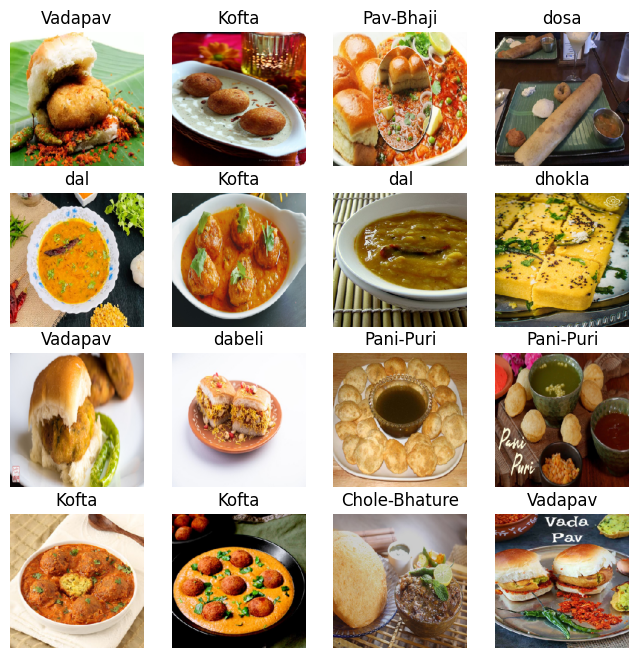

In [27]:
#visulaizing a few images from the dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8)) # specifying the overall grid size

for i in range(16):
    plt.subplot(4,4,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(X_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')

plt.show()

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=X_train[0].shape)
base_model.trainable = False ## Not trainable weights

In [30]:
#adding more layers to our model
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(15, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(train_generator,
          steps_per_epoch= 30,
          epochs=25,
          validation_data=(validation_generator),
          validation_steps=10)

Epoch 1/25


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Python311\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 ━━━━━━━━━━━━━━━━━━━━ 181s 6s/step - accuracy: 0.0888 - loss: 2.9786 - val_accuracy: 0.2188 - val_loss: 2.4208
Epoch 2/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.2024 - loss: 2.4822 - val_accuracy: 0.2375 - val_loss: 2.3809
Epoch 3/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.2192 - loss: 2.4424 - val_accuracy: 0.1230 - val_loss: 2.7861
Epoch 4/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 172s 6s/step - accuracy: 0.3202 - loss: 2.1547 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/25


c:\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5406 - val_loss: 1.6968
Epoch 6/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 234s 8s/step - accuracy: 0.4192 - loss: 1.8791 - val_accuracy: 0.5406 - val_loss: 1.6528
Epoch 7/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 222s 7s/step - accuracy: 0.4255 - loss: 1.7787 - val_accuracy: 0.2233 - val_loss: 2.1132
Epoch 8/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 156s 5s/step - accuracy: 0.5338 - loss: 1.4776 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 195s 7s/step - accuracy: 0.5700 - loss: 1.3654 - val_accuracy: 0.6562 - val_loss: 1.1015
Epoch 10/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5250 - val_loss: 1.6237
Epoch 11/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 197s 7s/step - accuracy: 0.5866 - loss: 1.3450 - val_accuracy: 0.4272 - val_loss: 1.7941
Epoch 12/25
30/30 ━━━━━━━━━━━━━━━━━━━━ 144s 5s/step - accuracy: 0.6619 - loss: 1.1257 - val_accura

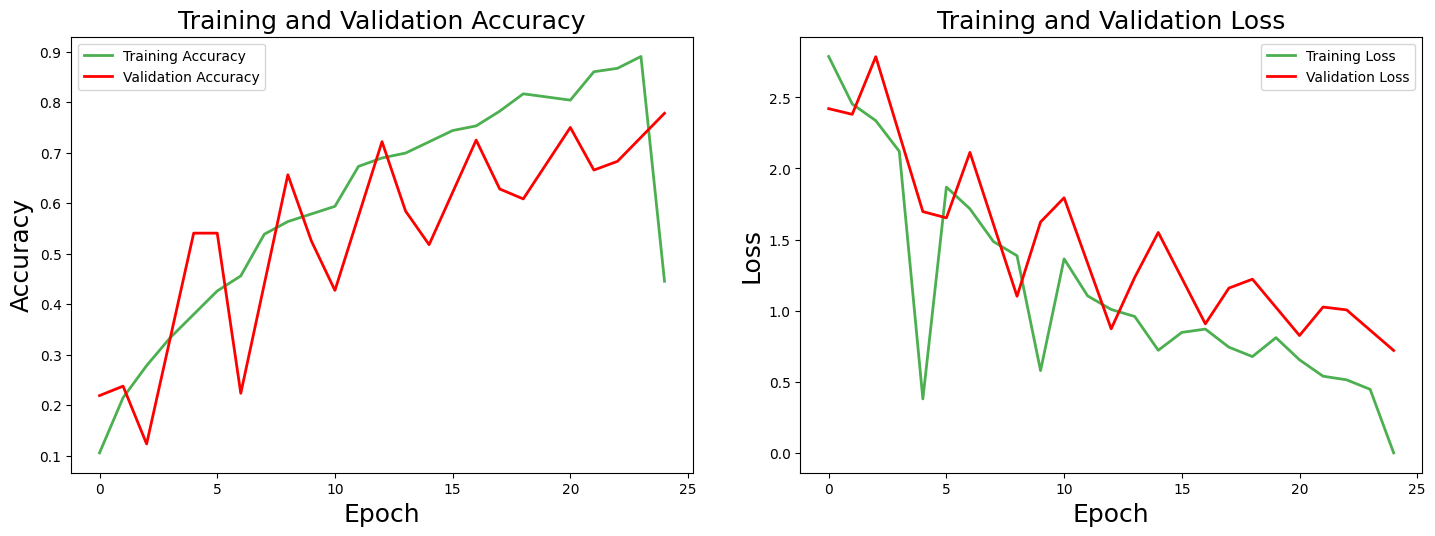

In [38]:
epochs_range = range(25)

acc = history.history['accuracy']
for i in range(1, len(acc)-1):
    if acc[i] == 0:
        acc[i] = (acc[i-1] + acc[i+1])/2

val_acc = history.history['val_accuracy']
for i in range(1, len(val_acc)-1):
    if val_acc[i] == 0 and i<len(acc):
        val_acc[i] = (val_acc[i-1] + val_acc[i+1])/2

loss = history.history['loss']
for i in range(1, len(loss)-1):
    if loss[i] == 0:
        loss[i] = (acc[i-1] + acc[i+1])/2

val_loss = history.history['val_loss']
for i in range(1, len(val_loss)-1):
    if val_loss[i] == 0:
        val_loss[i] = (val_loss[i-1] + val_loss[i+1])/2

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=2)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=2)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=2)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=2)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()

In [52]:
y_pred = model.predict(X_val)

29/29 ━━━━━━━━━━━━━━━━━━━━ 135s 5s/step


In [94]:
y_out = []
for _ in range(len(y_val)):
    result = np.zeros_like(y_val[0])
    result[np.argmax(y_pred[_])] = 1
    y_out.append(result)

y_out = np.array(y_out)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_out, target_names = class_names))

               precision    recall  f1-score   support

      Briyani       0.69      0.73      0.71        45
Chole-Bhature       0.55      0.62      0.58        65
      Frankie       0.82      0.60      0.69        68
       Jalebi       0.89      0.93      0.91        61
        Kofta       0.70      0.96      0.81       133
         Naan       0.87      0.76      0.81        70
 Paneer-Tikka       0.47      0.33      0.39        51
    Pani-Puri       0.50      0.26      0.34        35
    Pav-Bhaji       0.46      0.57      0.51        60
      Vadapav       0.84      0.95      0.89       107
       dabeli       0.53      0.45      0.49        44
          dal       0.74      0.71      0.73        52
       dhokla       0.89      0.69      0.78        49
         dosa       0.50      0.18      0.26        34
       pakora       0.62      0.72      0.67        54

    micro avg       0.70      0.70      0.70       928
    macro avg       0.67      0.63      0.64       928
 weighte

In [108]:
from sklearn.metrics import confusion_matrix
y_val1 = []
y_out1 = []
for _ in range(len(y_val)):
    y_val1.append(np.argmax(y_val[_]))
    y_out1.append(np.argmax(y_out[_]))
cf = confusion_matrix(y_val1, y_out1)

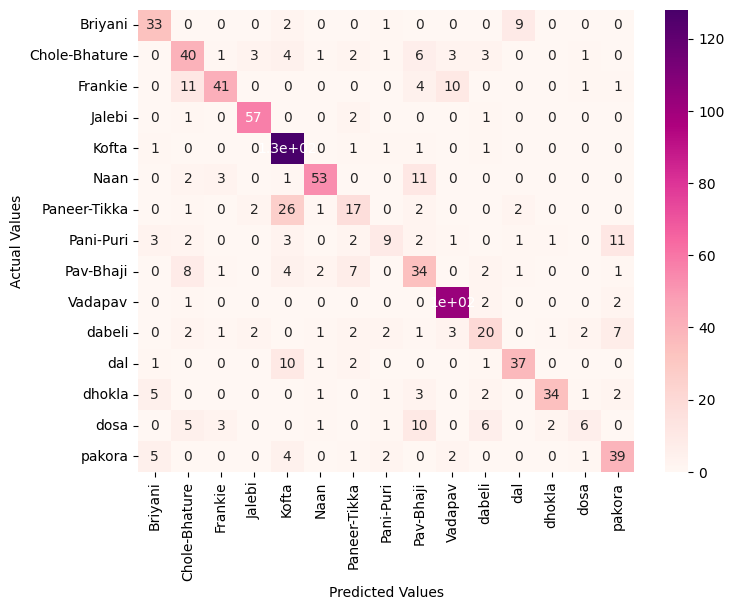

In [121]:
import seaborn as sns
import pandas as pd

cm_df = pd.DataFrame(cf, index = class_names, columns = class_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot = True, cmap = 'RdPu')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()